<a href="https://colab.research.google.com/github/KaydeeJR/logistics-optimization-causal-inference/blob/Main/notebooks/gokada_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Access data from drive folder

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
driver_locations = "/content/gdrive/MyDrive/week_8_data/driver_locations_during_request.csv"
nb_completed_orders = "/content/gdrive/MyDrive/week_8_data/nb.csv"

In [5]:
import pandas as pd
dloc_dataframe = pd.read_csv(driver_locations)
nb_dataframe = pd.read_csv(nb_completed_orders)

# **EDA Analysis**

## Sample data

In [6]:
dloc_dataframe.head()

,id,order_id,driver_id,driver_action,lat,lng,created_at,updated_at
0,1,392001,243828,accepted,6.602207,3.270465,NaN,NaN
1,2,392001,243588,rejected,6.592097,3.287445,NaN,NaN
2,3,392001,243830,rejected,6.596133,3.281784,NaN,NaN
3,4,392001,243539,rejected,6.596142,3.280526,NaN,NaN
4,5,392001,171653,rejected,6.609232,3.288800,NaN,NaN


In [7]:
nb_dataframe.head()

,Trip ID,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
0,391996,"6.508813001668548,3.37740316890347","6.650969799999999,3.3450307",2021-07-01 07:28:04,2021-07-01 07:29:37
1,391997,"6.4316714,3.4555375","6.4280814653326,3.4721885847586",2021-07-01 06:38:04,2021-07-01 07:07:28
2,391998,"6.631679399999999,3.3388976","6.508324099999999,3.3590397",2021-07-01 06:21:02,2021-07-01 07:02:23
3,391999,"6.572757200000001,3.3677082","6.584881099999999,3.3614073",2021-07-01 07:16:07,2021-07-01 07:29:42
4,392001,"6.6010417,3.2766339","6.4501069,3.3916154",2021-07-01 09:30:59,2021-07-01 09:34:36


## Univariate analysis

In [8]:
dloc_dataframe.describe()

,id,order_id,driver_id,lat,lng,created_at,updated_at
count,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,1.557740e+06,0.0,0.0
mean,7.788705e+05,4.191833e+05,2.341505e+05,6.536031e+00,3.378877e+00,NaN,NaN
std,4.496809e+05,1.444531e+04,2.270475e+04,5.998150e-02,5.333432e-02,NaN,NaN
min,1.000000e+00,3.920010e+05,1.219810e+05,6.409333e+00,3.076561e+00,NaN,NaN
25%,3.894358e+05,4.067650e+05,2.429970e+05,6.498694e+00,3.348810e+00,NaN,NaN
50%,7.788705e+05,4.216870e+05,2.435890e+05,6.544247e+00,3.363504e+00,NaN,NaN
75%,1.168305e+06,4.293130e+05,2.440560e+05,6.593276e+00,3.385177e+00,NaN,NaN
max,1.557740e+06,5.179480e+05,2.478770e+05,7.702536e+00,8.515414e+00,NaN,NaN


In [9]:
dloc_dataframe['driver_action'].describe()

count      1557740
unique           2
top       rejected
freq       1531837
Name: driver_action, dtype: object

In [10]:
nb_dataframe.describe()

,Trip ID
count,5.360200e+05
mean,9.910221e+05
std,3.456364e+05
min,3.919960e+05
25%,6.935610e+05
50%,9.910085e+05
75%,1.281570e+06
max,1.637709e+06


In [11]:
nb_dataframe.drop(['Trip ID'], axis=1).describe()

,Trip Origin,Trip Destination,Trip Start Time,Trip End Time
count,536020,536020,534369,536019
unique,112142,147520,512516,513854
top,"6.6137933,3.357997","6.4567308,3.5309404",2021-12-28 18:16:31,2021-12-16 19:23:56
freq,888,844,8,8


## Column datatypes

In [12]:
dloc_dataframe.dtypes

id                 int64
order_id           int64
driver_id          int64
driver_action     object
lat              float64
lng              float64
created_at       float64
updated_at       float64
dtype: object

In [13]:
nb_dataframe.dtypes

Trip ID              int64
Trip Origin         object
Trip Destination    object
Trip Start Time     object
Trip End Time       object
dtype: object

## Missing values in each dataset

In [14]:
print(dloc_dataframe.isnull().sum() * 100 / len(dloc_dataframe))

id                 0.0
order_id           0.0
driver_id          0.0
driver_action      0.0
lat                0.0
lng                0.0
created_at       100.0
updated_at       100.0
dtype: float64


In [15]:
print(nb_dataframe.isnull().sum() * 100 / len(dloc_dataframe))
print(nb_dataframe.isnull().sum())

Trip ID             0.000000
Trip Origin         0.000000
Trip Destination    0.000000
Trip Start Time     0.105987
Trip End Time       0.000064
dtype: float64
Trip ID                0
Trip Origin            0
Trip Destination       0
Trip Start Time     1651
Trip End Time          1
dtype: int64


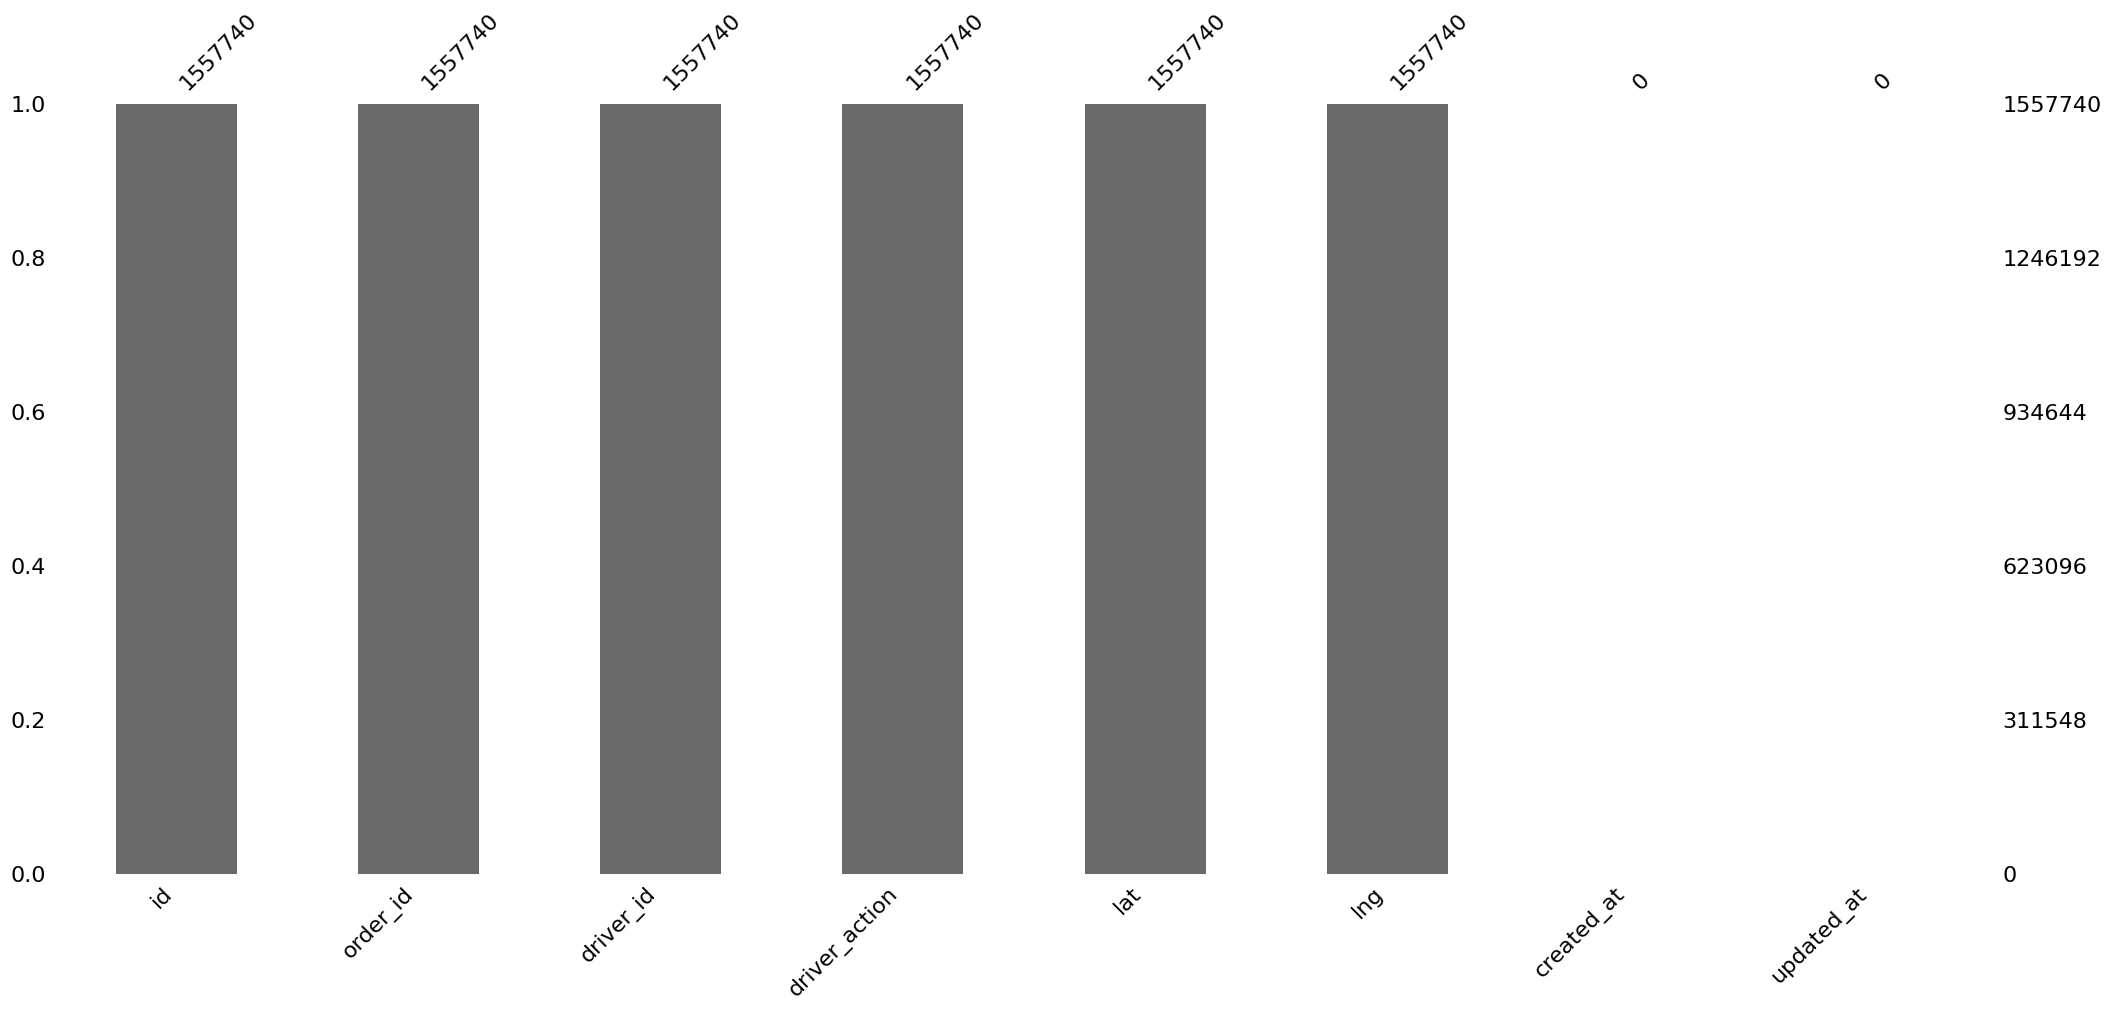

In [16]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(dloc_dataframe, labels=list(dloc_dataframe.columns))
plt.show()

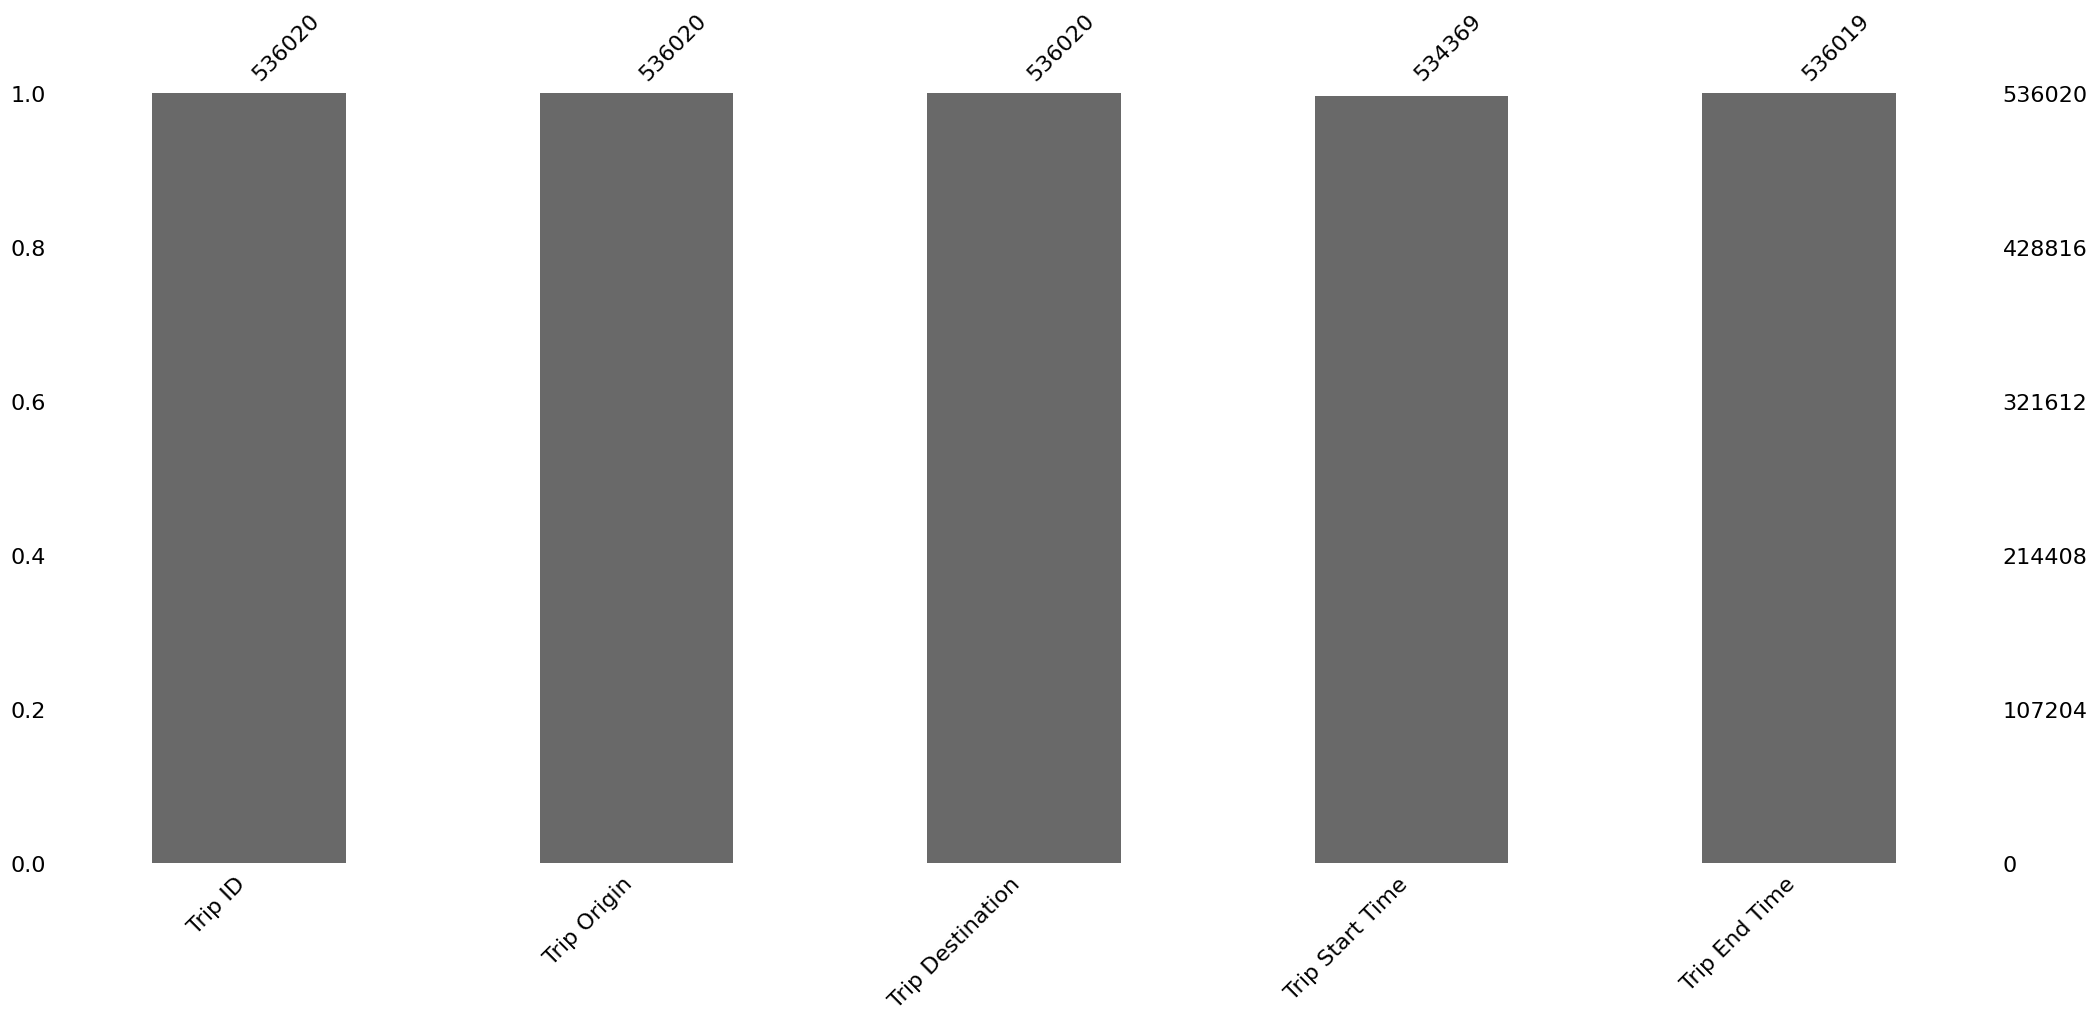

In [17]:
import missingno as msno
import matplotlib.pyplot as plt
msno.bar(nb_dataframe, labels=list(nb_dataframe.columns))
plt.show()

## Merging datasets

In [18]:
# using driver location dataframe as the base dataframe
merged_data = pd.merge(nb_dataframe, dloc_dataframe, left_index=True, right_on='order_id').reset_index()
merged_data.drop('index',axis=1).to_csv('/content/gdrive/MyDrive/week_8_data/merged_data .csv')